In [172]:
Packages <- c("dplyr","ggplot2", "bbmle",  "dplyr", "tidyr","data.table", "tidyverse", "lubridate", "RColorBrewer")

invisible(suppressPackageStartupMessages(lapply(Packages, library, character.only = TRUE)))

setwd('/local/home/katrinac/gordita/')
"%!in%" <- function(x,table) match(x,table, nomatch = 0) == 0

bar_res <- read.csv(file="~/gordita//input/bar-on_results.csv", header=T)

In [125]:
#normal distribution function plus error function, testing

norm <- function(bs, mean, sd_log){
    
    biomass <- (1/(sqrt(2*pi*sd_log)))*exp(-((bs-mean)^2)/(2*sd_log))

return(biomass)

}




bar_res_log <- bar_res %>%
    mutate(min_bs_log =log10(min_bs_g)) %>%
    mutate(max_bs_log =log10(max_bs_g)) %>%
    mutate(mean_bs_log =log10(bs_g)) %>%
    mutate(biomass_spp = biomass_gC/diversity) %>%
    mutate(var_log =(sqrt(diversity)*bs_g)/1.96) %>%
    mutate(sd_log = var_log^2) 



In [126]:
bar_res_log

taxa,min_bs_g,max_bs_g,bs_g,biomass_gC,abundance,diversity,min_bs_log,max_bs_log,mean_bs_log,biomass_spp,var_log,sd_log
plants,2.0e+02,3e+06,1.5e+05,1.50000e+17,3.000000e+12,400000,2.3010300,6.477121,5.1760913,3.750000e+11,4.840221e+07,2.342774e+15
bacteria,4.0e-14,4e-11,2.6e-14,7.33967e+16,2.854070e+30,10358,-13.3979400,-10.397940,-13.5850267,7.085992e+12,1.350067e-12,1.822680e-24
archaea,4.0e-14,4e-11,2.4e-14,7.40323e+15,3.031050e+29,502,-13.3979400,-10.397940,-13.6197888,1.474747e+13,2.743513e-13,7.526864e-26
fungi,1.5e-11,5e+03,1.5e-11,1.21268e+16,8.084550e+26,1000000,-10.8239087,3.698970,-10.8239087,1.212680e+10,7.653061e-09,5.856935e-17
arthropods,1.0e-07,9e+02,8.2e-06,1.15192e+15,1.411540e+20,943383,-7.0000000,2.954243,-5.0861861,1.221052e+09,4.063514e-03,1.651215e-05
annelids,1.0e-04,1e+02,2.6e-04,1.98506e+14,7.714350e+17,13199,-4.0000000,2.000000,-3.5850267,1.503947e+10,1.524010e-02,2.322606e-04
molluscs,1.0e-03,1e+04,3.7e-04,1.81985e+14,4.972310e+17,41642,-3.0000000,4.000000,-3.4317983,4.370227e+09,3.852223e-02,1.483962e-03
cnidarians,2.0e-03,2e+01,4.6e-03,8.96168e+13,1.965670e+16,11490,-2.6989700,1.301030,-2.3372422,7.799547e+09,2.515717e-01,6.328832e-02
fish,1.0e-02,1e+06,6.0e-01,6.67611e+14,1.115690e+15,18223,-2.0000000,6.000000,-0.2218487,3.663563e+10,4.132426e+01,1.707695e+03
nematodes,5.0e-08,1e+02,5.0e-08,1.96117e+13,3.922330e+20,9984,-7.3010300,2.000000,-7.3010300,1.964313e+09,2.548979e-06,6.497293e-12


In [23]:
#what does it look like with lognormal distributions?
plants <- rlnorm(4000, meanlog = log(1.5e+05), sdlog = 0.5)


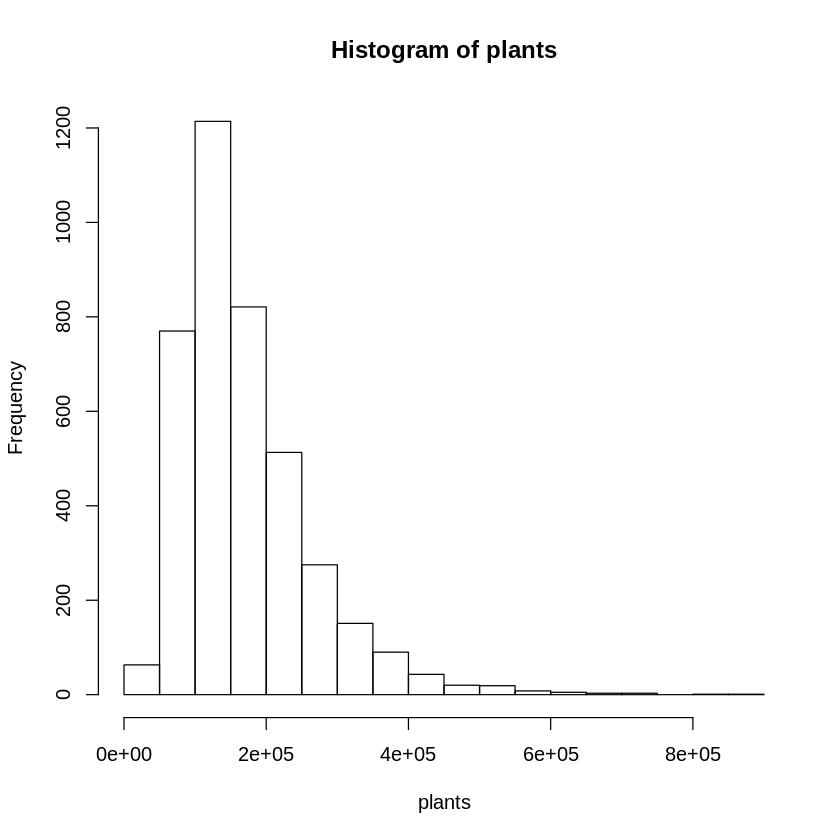

In [24]:
hist(plants)

In [206]:
#for loop generating random numbers from log normal distribution given mean

plants <- bar_res_log %>%  
    filter(taxa=="plants")
ci_lower <- plants$min_bs_g_log
ci_upper <- plants$max_bs_g_log
mean <- plants$mean_bs_log
n <- plants$diversity

#compute sd in log body size
var_log <- (sqrt(n)*mean)/1.96
sd_log <- sqrt(var_log)

#generate a list of values for plant body size
plant_bs_dist <- data.table(body_size=(rnorm(n, mean, sd_log)))

#normal distribution function plus error function, testing

norm <- function(bs, mean, sd_log){
    
    biomass <- (1/(sqrt(2*pi*sd_log)))*exp(-(bs-mean)^2)/(2*sd_log^2)

return(biomass)

}

biomass <- setNames(data.table(matrix(nrow = n, ncol = 1)), c("density"))

for(i in 1:nrow(plant_bs_dist)){

    bs <- plant_bs_dist$body_size[i]
    biomass$density[i] <- dnorm(bs, mean, sd_log)   

}
plant_bs_bio <- cbind(plant_bs_dist, biomass)

In [207]:
head(plant_bs_bio)

body_size,density
-21.130850,0.007935014
-53.843694,0.003440741
12.384043,0.009610976
1.713482,0.009726652
-49.248135,0.004021902
36.309472,0.007303055


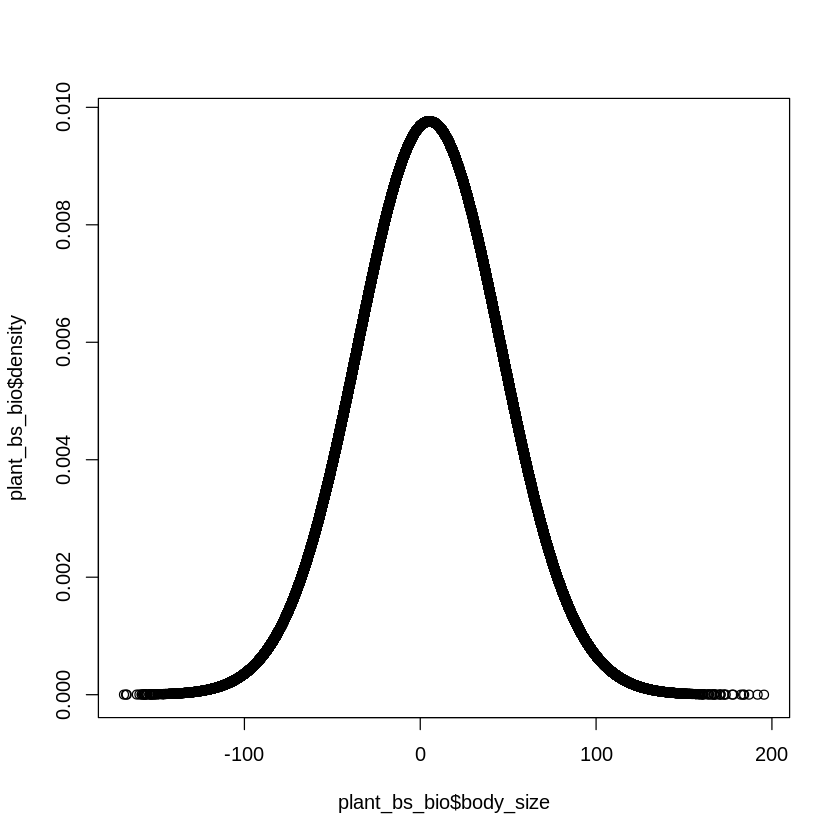

In [208]:
plot(plant_bs_bio$body_size, plant_bs_bio$density)

In [ ]:
###next, add error function and multiply each value of x (density) by total biomass of taxa

Warning message in log(norm_vec):
“NaNs produced”

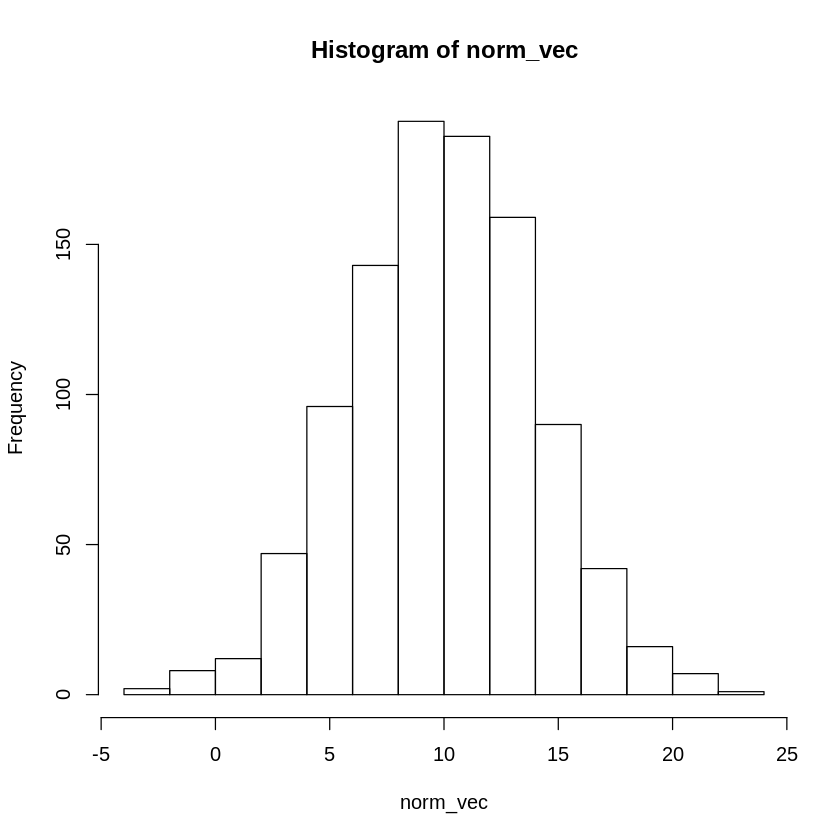

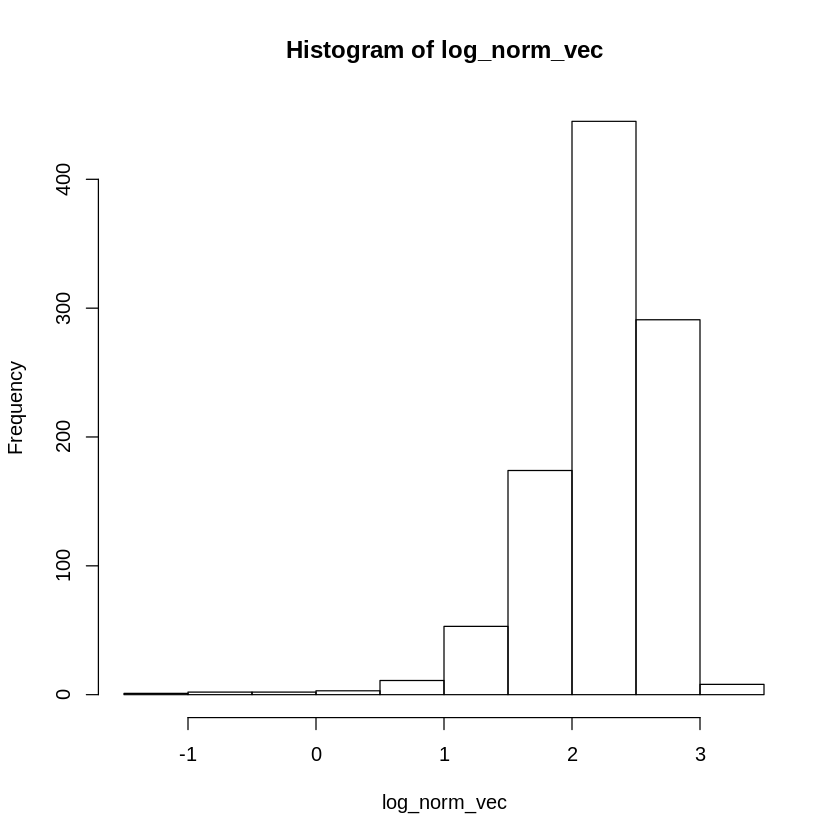

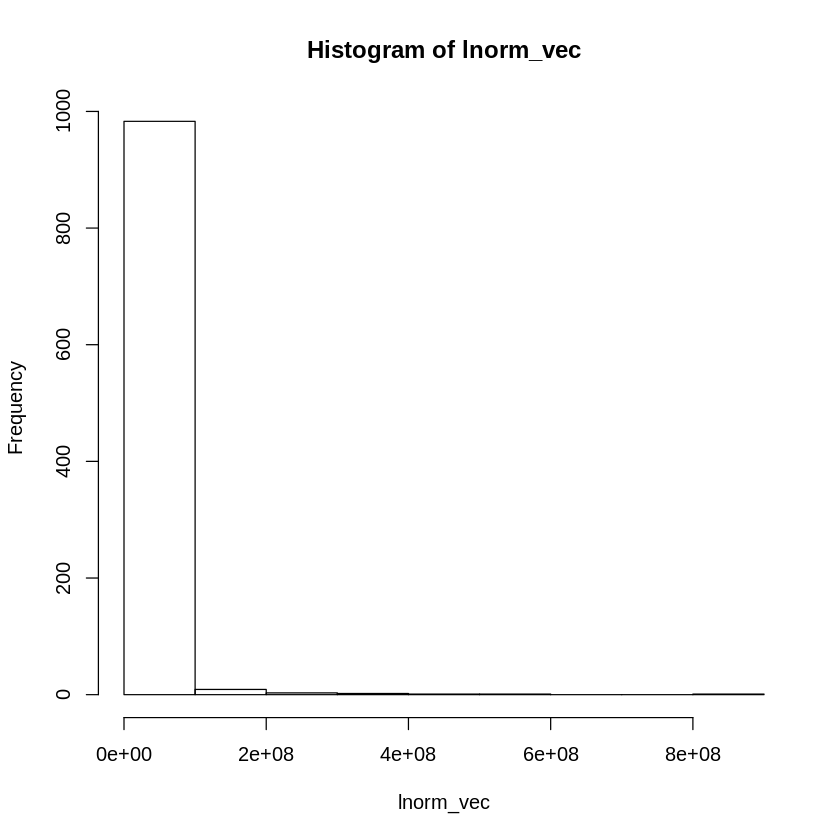

In [7]:
#is a log-normal distribution the same as a normal distribution

norm_vec <- rnorm(1000, 10, 4)
hist(norm_vec)

log_norm_vec <- log(norm_vec)
hist(log_norm_vec)

#they are definitely different
lnorm_vec <- rlnorm(1000, 10, 4)
hist(lnorm_vec)




In [8]:
## test fit distribution with arthropod data
min_bs <- 1.0E-07
max_bs <- 9.0E+02
mean_bs <- 8.2E-06
n <- 1.41154E+20

#okay the problem is that we don't know SD. But we do know the max body size, so we can evaluate the CDF at the maximum body size value and solve for sigma (I think)
#CDF for log normal distribution is 

In [ ]:
#allometric scaling intuition
#log y = a logx +log k, y and k

In [9]:
min

[1] 1e-07

In [ ]:
#start thinking about how to fit the distributions